In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Choose an image with low contrast whose pixels not occupy the full dynamic range and work with it as gray image.

In [2]:
img = cv2.imread("pout.jpg", 0)

### Deduce the original image range from a to b [min and max of image pixels]

In [3]:
a = img.min()
b = img.max()
print("The minimum pixel range is:",a)
print("The maximum pixel range is:",b)

The minimum pixel range is: 72
The maximum pixel range is: 229


### Plot the histogram

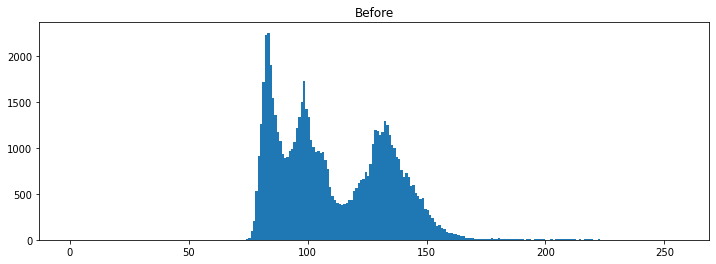

In [4]:
fig = plt.figure(figsize=(12, 4))
plt.hist(img.ravel(), 256, [0, 256])
plt.title("Before")
plt.show()

### Apply contrast stretching on image pixels to utilize the full dynamic range [0,255]

In [5]:
# input new value for min and max
c = 0
d = 255

#### The equation for each pixel is:
$ Px(i) = (\frac{newmax-newmin}{oldmax - oldmin} * (Px(i)-oldmin))+ newmin$

In [6]:
x = (d - c) / (b - a)
# map the image pixels to the new range
img_eq = (x * (img - a)) + c

### Display the new image

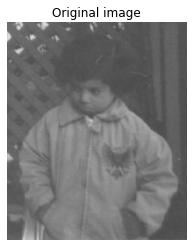

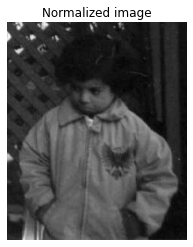

In [7]:
ImageNormalized = img_eq.astype(np.uint8)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original image')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(ImageNormalized, cv2.COLOR_BGR2RGB))
plt.title('Normalized image')
plt.axis('off')
plt.show()

### Plot the modified image histogram

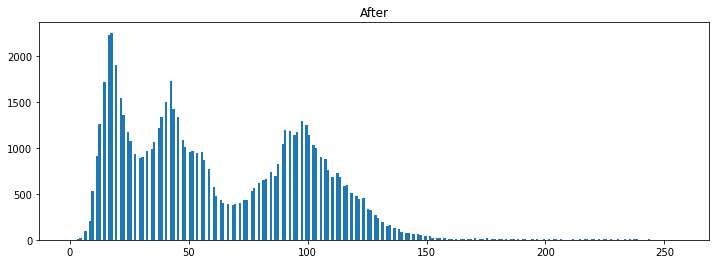

In [8]:
fig = plt.figure(figsize=(12, 4))

plt.hist(ImageNormalized.ravel(), 256, [0, 256])
plt.title("After")
plt.show()